# Lifespan Distributions of Artists

In [2]:
import pandas as pd
import json
import numpy as np
import statistics as stats

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')

In [3]:
df_original = pd.read_csv('artists_statistics14.csv')

In [4]:
df_original.head(10)

,id,sortable_name,birthyear,deathyear,age,gender,nationality,hometown,location,similar_artists,similar_artists_names,genes,gene_types,artwork_link,artwork_names,published_artworks,pub_artworks_info
0,57c80d15a09a6753d4000a13,0331с and Grisha,Blank,Blank,0,Male,Russian,"Khimki, Moscow Oblast, Russia","Moscow, Russia",https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=57c8...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
1,52c721e5b202a3edf1000072,03B Muren,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=52c7...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
2,5cdae4d455d8c8318b939791,06D Atelier,Blank,Blank,0,Blank,Italian,Blank,"London, UK",https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5cda...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
3,5d6f9f7e3a583e000e51956d,1+1+1,Blank,Blank,0,Blank,Finnish;Swedish;Icelandic,Blank,"Reykjavík, Iceland",https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5d6f...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
4,5568f47672616954f4980000,1010,1979,Blank,0,Male,Not specified,Poland,Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5568...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
5,55e1b6717261693b9e000784,108,1978,Blank,0,Male,Italian,"Alessandria, Italy",Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=55e1...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
6,5cc9c1f473cb733537605ca5,11 pittori italiani d'oggi,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5cc9...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
7,5cb8e61ccd72140012713a11,1100 Architect (David Piscuskus and Juergen Ri...,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5cb8...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
8,5cc9c2c62999cb75f7a34624,13 Pittori a Roma,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5cc9...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd
9,56421d54258faf667f0001be,14 June,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,tbd,https://api.artsy.net/api/genes?artist_id=5642...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd,https://api.artsy.net/api/artworks?artist_id=5...,tbd


In [7]:
years2 = []
for i in range(df_original.shape[0]):
    if df_original.iloc[i]['birthyear'] != 'Blank' and df_original.iloc[i]['birthyear'] != 'Not specified':
        if df_original.iloc[i]['deathyear'] != 'Blank' and df_original.iloc[i]['deathyear'] != 'Not specified':
            years2.append([df_original.iloc[i]['birthyear'], df_original.iloc[i]['deathyear'], i])

In [20]:
years2

[['1957', '1962', 67],
 ['1922', '2016', 89],
 ['1845', '1905', 106],
 ['1943', '2019', 109],
 ['1923', '2000', 136],
 ['1923', '1985', 164],
 ['1912', '1988', 165],
 ['1898', '1976', 181],
 ['1896', '1980', 209],
 ['1916', '2006', 213],
 ['1946', '2004', 232],
 ['1930', '2017', 240],
 ['1878', '1942', 251],
 ['1944', '2018', 259],
 ['1803', '1866', 277],
 ['1883', '1973', 279],
 ['1856', '1938', 281],
 ['1853', '1927', 282],
 ['1852', '1911', 286],
 ['1921', '1984', 287],
 ['1888', '1953', 288],
 ['1898', '1991', 293],
 ['1760', '1802', 299],
 ['1926', '2004', 308],
 ['1919', '2002', 319],
 ['1917', '1985', 322],
 ['1938', '2001', 323],
 ['1928', '2008', 344],
 ['1918', '2001', 384],
 ['1914', '1976', 406],
 ['1857', '1918', 427],
 ['1889', '1965', 428],
 ['1922', '2008', 441],
 ['1909', '1977', 457],
 ['1743', '1809', 488],
 ['1877', '1936', 500],
 ['1928', '2012', 504],
 ['1919', '1999', 508],
 ['1538', '1591', 511],
 ['1538', '1587', 543],
 ['1585', '1650', 544],
 ['1640', '1723', 

In [39]:
dfages = pd.DataFrame(columns=('Birthyear', 'Deathyear', 'Age'))

In [40]:
dfages['Birthyear'] = [i[0] for i in years2]
dfages['Deathyear'] = [i[1] for i in years2]

In [42]:
for i in range(lifespandf.shape[0]):
    if lifespandf.iloc[i]['death year'] != 'Not specified' and lifespandf.iloc[i]['birth year'] != 'Not specified':
        if lifespandf.iloc[i]['birth year'] != 'Unknown' and lifespandf.iloc[i]['death year'] != 'Unknown':
            if lifespandf.iloc[i]['birth year'] != '' and lifespandf.iloc[i]['death year'] != '':
                if lifespandf.iloc[i]['birth year'] != 0 and lifespandf.iloc[i]['death year'] != 0:
                    lifespandf.iloc[i]['age'] = int(lifespandf.iloc[i]['death year']) - int(lifespandf.iloc[i]['birth year'])

In [23]:
deathyeartypes = ';'.join(dfages['Deathyear'])
birthyeartypes = ';'.join(dfages['Birthyear'])

In [24]:
lifespandf=pd.DataFrame(columns=['birth year', 'death year', 'age'])

In [25]:
lifespandf['birth year'] = birthyeartypes.split(';')

In [26]:
lifespandf['death year'] = deathyeartypes.split(';')

In [43]:
lifespandf

,birth year,death year,age
0,1957,1962,5
1,1922,2016,94
2,1845,1905,60
3,1943,2019,76
4,1923,2000,77
5,1923,1985,62
6,1912,1988,76
7,1898,1976,78
8,1896,1980,84
9,1916,2006,90


In [49]:
lifespanplot = lifespandf['age'].values

In [58]:
lifespancleanplot = []
for i in lifespanplot:
    if i > 0 and i != 0:
        if i < 150:
            lifespancleanplot.append(i)

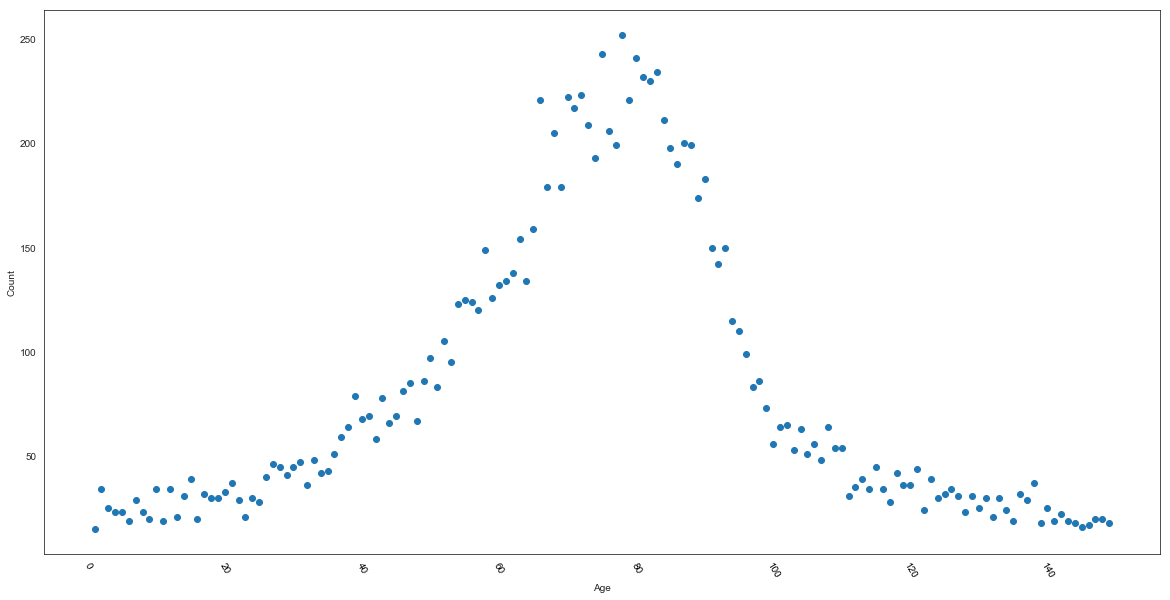

In [59]:
lifespanvalues, lifespancount = np.unique(lifespancleanplot, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.tick_params(axis="x", labelsize=10, labelrotation=-60, labelcolor='black')
ax.scatter(lifespanvalues, lifespancount)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# I know the birth years and death years after splitting by multiple artist were aligned correctly (byear A:dyear B),
# but i have about 15 values that were over 1000 and about 15 that were less than 0, neglibable?